# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
 #Загрузите данные из csv-файла в датафрейм c помощью библиотеки pandas.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', '\t')
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#Изучите общую информацию о полученном датафрейме.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

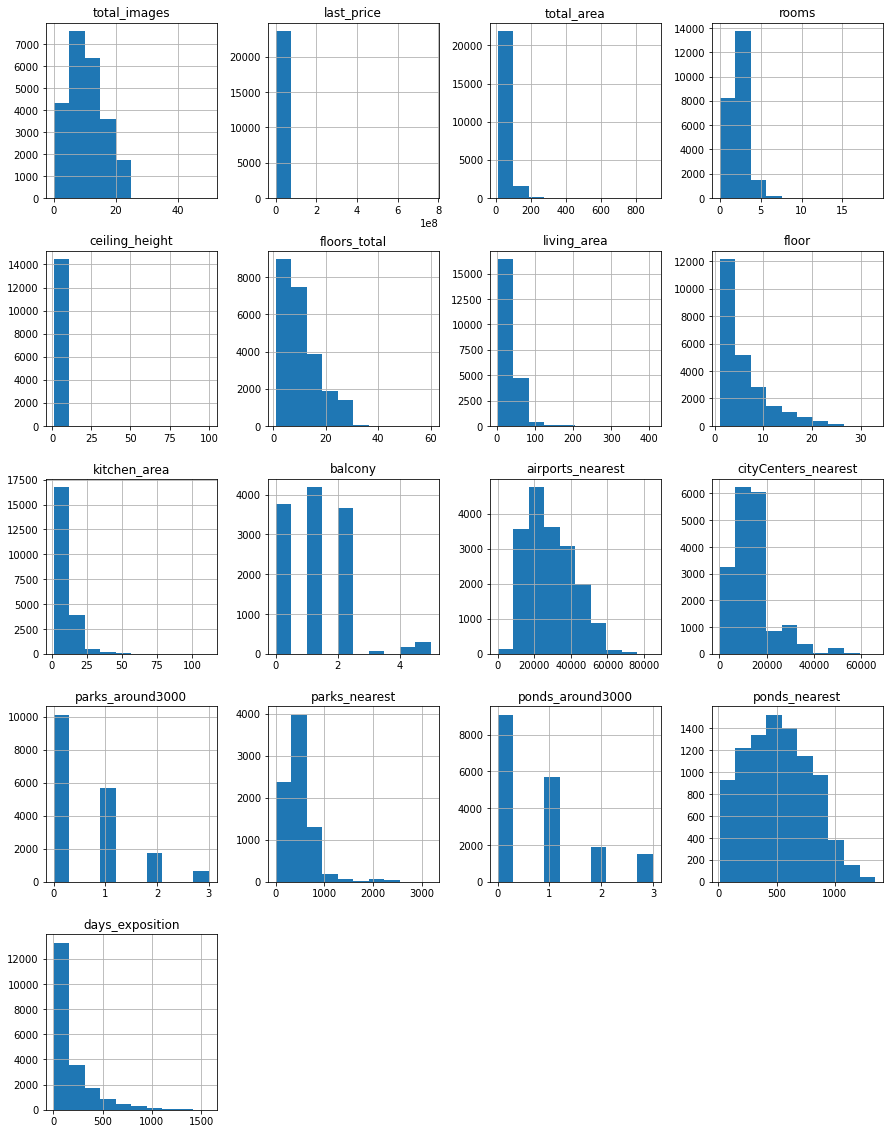

In [4]:
#Постройте гистограмму для всех числовых столбцов таблицы на одном графике. 
  
df.hist(figsize=(15, 20));

Получили на входе 23699 записи. Есть пропущенные значения и некорректный тип данных. Встречаются аномальные значения.

### Выполните предобработку данных

2.1. Найдите и изучите пропущенные значения в столбцах:

Для начала выведем количество пропусков на экран: 

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

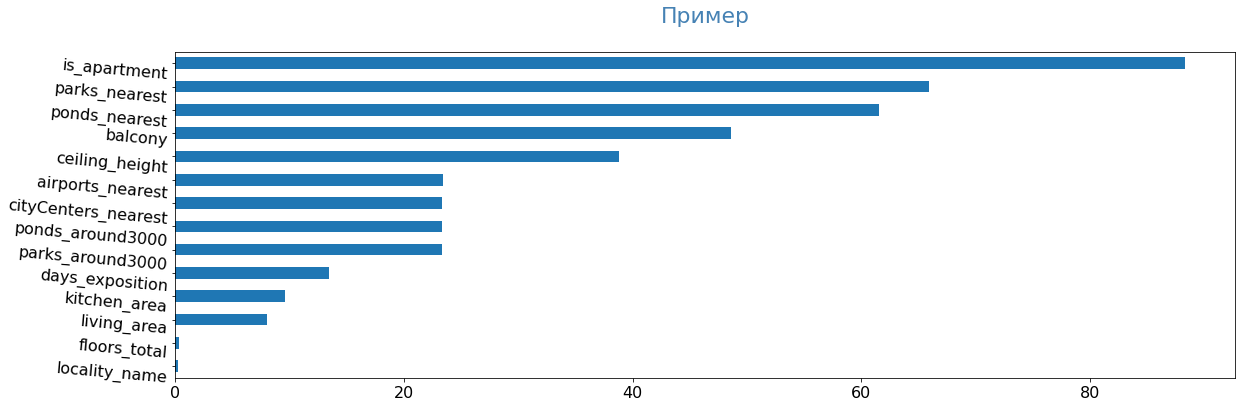

In [7]:
pass_value_barh(df)

In [8]:
#удаляем пропуски там, где это необходимо и возможно в столбцах, где указана информацмя о...


df['airports_nearest'] = df['airports_nearest'].fillna(value=0)
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)

# Удаляем записи, где отсутствует локация и этажность

df.dropna(subset=['locality_name'], inplace=True)
df.dropna(subset=['floors_total'], inplace=True)



In [9]:
df.groupby('locality_name')['cityCenters_nearest'].value_counts()

locality_name   cityCenters_nearest
Зеленогорск     51115.0                2
                52696.0                2
                52717.0                2
                53568.0                2
                52628.0                1
                                      ..
посёлок Шушары  31602.0                1
                31604.0                1
                31730.0                1
                31988.0                1
                32079.0                1
Name: cityCenters_nearest, Length: 7665, dtype: int64

<AxesSubplot:>

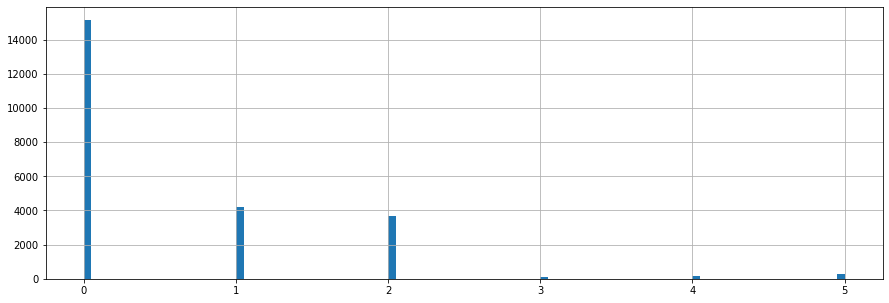

In [10]:
#балконах
df['balcony'] = df['balcony'].fillna(value=0)
df['balcony'].describe()
df['balcony'].hist(bins=100, figsize = (15,5))

In [11]:
#заполнение пропусков в значении столбца is apartment
df['is_apartment'] = df['is_apartment'].fillna(value=False)
df['is_apartment'].value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


<AxesSubplot:>

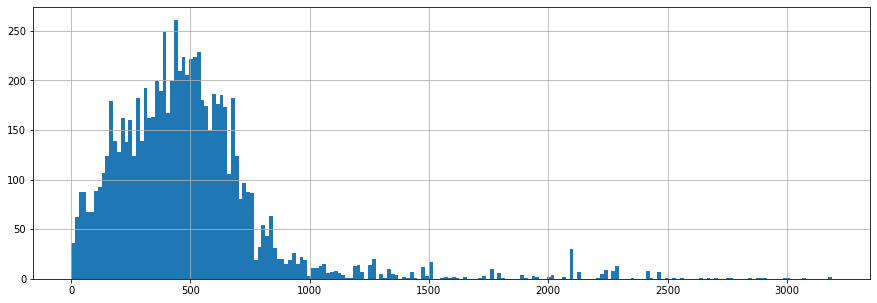

In [12]:
pivot_park = df.pivot_table(index='locality_name', values='parks_nearest', aggfunc='median')
local = df.locality_name.unique()
dict_park = {}
med = df['parks_nearest'].median()

#df.parks_nearest = df.parks_nearest.fillna(0) 

#заполняет словарь группы медианными значениями
for i in local:
    if i in pivot_park.index:
        dict_park[i] = pivot_park.loc[i,'parks_nearest']
    else:
        dict_park[i] = med
        
#df['parks_nearest'] = df.groupby('locality_name')['parks_nearest'].fillna(df['parks_nearest'].median())
print(df['parks_nearest'].describe())
df['parks_nearest'].hist(bins = 200, figsize = (15,5))

count    9036.000000
mean      518.289509
std       278.009558
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


<AxesSubplot:>

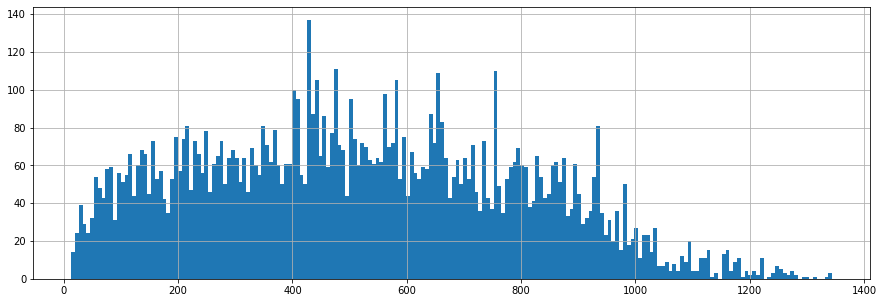

In [13]:
pivot_ponds = df.pivot_table(index='locality_name', values='ponds_nearest', aggfunc='median')
local = df.locality_name.unique()
dict_ponds = {}
med_ponds = df['ponds_nearest'].median()

#df.ceiling_height = df.ceiling_height.fillna(0) 

#заполняет словарь группы медианными значениями
for i in local:
    if i in pivot_ponds.index:
        dict_ponds[i] = pivot_ponds.loc[i,'ponds_nearest']
    else:
        dict_ponds[i] = med_ponds
     
    

#df['ponds_nearest'] = df.groupby('locality_name')['ponds_nearest'].fillna(df['ponds_nearest'].median())

print(df['ponds_nearest'].describe())
df['ponds_nearest'].hist(bins = 200, figsize = (15,5))

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


<AxesSubplot:>

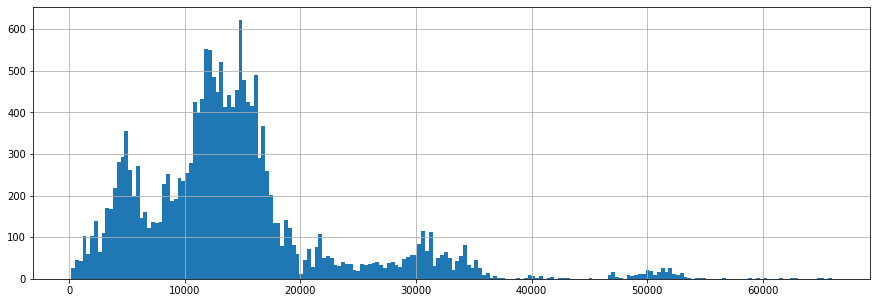

In [14]:
#заполнение пропусков в значениях столбца по удаленности от центра города

pivot_cc = df.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='median')
local = df.locality_name.unique()
dict_cc = {}
med = df.groupby('locality_name')['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())


#заполняет словарь группы медианными значениями
for i in local:
    if i in pivot_cc.index:
        dict_cc[i] = pivot_cc.loc[i,'cityCenters_nearest']
    else:
        dict_cc[i] = med
        
#df['cityCenters_nearest'] = df.groupby('locality_name')['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())

print(df['cityCenters_nearest'].describe())
df['cityCenters_nearest'].hist(bins = 200, figsize = (15,5))

In [15]:
#пыталась исправить пропуски таким образом, чтобы учесть высоту потолков в питере
df.loc[df['locality_name'] != 'Санкт-Петербург'].fillna(df['ceiling_height'].median())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.00,0.0,2.65,0.0,2.65,81.00
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,0.0,2.65,0.0,2.65,0.0,2.65,55.00
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.00,0.0,2.65,0.0,2.65,155.00
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,0.0,2.65,0.0,2.65,0.0,2.65,189.00
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,2.65,5.0,31.00,4,False,...,6.00,1.0,Ломоносов,48252.0,51677.00,0.0,2.65,0.0,2.65,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.50,4,False,...,6.00,0.0,Тихвин,0.0,2.65,0.0,2.65,0.0,2.65,413.00
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.00,8,False,...,8.00,0.0,Петергоф,45602.0,34104.00,1.0,352.00,1.0,675.00,239.00
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.00,4,False,...,8.50,0.0,Тосно,0.0,2.65,0.0,2.65,0.0,2.65,45.00
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.70,1,False,...,2.65,0.0,село Рождествено,0.0,2.65,0.0,2.65,0.0,2.65,2.65


In [16]:
df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest').fillna(df['ceiling_height'].median())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.00,2.0,755.00,2.65
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.00,2.0,574.00,558.00
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,2.65,9,False,...,2.65,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.00,3.0,234.00,424.00
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.00,1.0,48.00,121.00
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,2.65,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,2.65,0.0,2.65,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.30,4,False,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.00,2.0,652.00,29.00
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,2.65,5.0,31.00,2,False,...,6.00,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.00,0.0,2.65,15.00
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.30,7,False,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,2.65,1.0,806.00,519.00
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.00,3.0,381.00,2.65


In [17]:
df.query('total_area*0.9 <= (living_area + kitchen_area)').sort_values(by = 'total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19642,5,1190000.0,14.0,2018-07-29T00:00:00,1,NaN,5.0,11.0,1,False,...,2.0,0.0,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
10208,3,1900000.0,17.0,2018-08-14T00:00:00,1,2.75,4.0,13.0,2,False,...,3.0,0.0,Санкт-Петербург,25072.0,5639.0,0.0,NaN,0.0,NaN,7.0
8873,6,2950000.0,20.0,2016-06-18T00:00:00,1,NaN,7.0,14.0,1,False,...,6.0,0.0,Санкт-Петербург,24053.0,4621.0,1.0,247.0,0.0,NaN,38.0
4077,10,3000000.0,20.0,2017-04-10T00:00:00,2,NaN,6.0,13.0,2,False,...,5.6,0.0,Санкт-Петербург,28450.0,6996.0,2.0,223.0,1.0,611.0,16.0
6544,4,2740000.0,20.3,2018-12-18T00:00:00,1,3.00,6.0,16.0,1,False,...,4.0,0.0,Санкт-Петербург,26191.0,4893.0,0.0,NaN,1.0,1018.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10246,10,25023000.0,253.7,2017-11-10T00:00:00,6,NaN,4.0,200.0,2,False,...,33.0,0.0,Санкт-Петербург,20687.0,1214.0,3.0,103.0,3.0,155.0,90.0
2489,9,12500000.0,255.0,2017-04-21T00:00:00,3,NaN,2.0,153.9,2,False,...,100.7,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
15701,12,83000000.0,293.6,2017-11-10T00:00:00,4,NaN,9.0,250.0,7,False,...,35.0,0.0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,NaN
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.0,2,False,...,50.0,0.0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0


встречаются аномалии, где общая площадь меньше суммы площадей жилой и кухни. Суммарно таких строк 2% от общего набора данных. можно их удалить. 

#### check nan

In [18]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [19]:
df = df.drop(df.query('total_area*0.9 <= (living_area + kitchen_area)').index) 


In [20]:
# check
df.shape[0]

23091

In [21]:
# check
import matplotlib.pyplot as plt

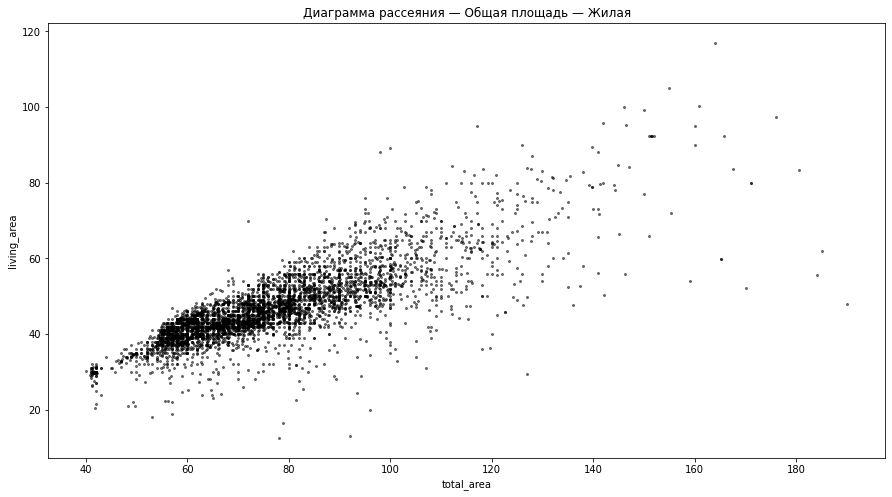

In [22]:
# check
df[df['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

locality_name
Бокситогорск            AxesSubplot(0.125,0.125;0.775x0.755)
Волосово                AxesSubplot(0.125,0.125;0.775x0.755)
Волхов                  AxesSubplot(0.125,0.125;0.775x0.755)
Всеволожск              AxesSubplot(0.125,0.125;0.775x0.755)
Выборг                  AxesSubplot(0.125,0.125;0.775x0.755)
                                        ...                 
село Путилово           AxesSubplot(0.125,0.125;0.775x0.755)
село Рождествено        AxesSubplot(0.125,0.125;0.775x0.755)
село Русско-Высоцкое    AxesSubplot(0.125,0.125;0.775x0.755)
село Старая Ладога      AxesSubplot(0.125,0.125;0.775x0.755)
село Шум                AxesSubplot(0.125,0.125;0.775x0.755)
Name: parks_nearest, Length: 362, dtype: object

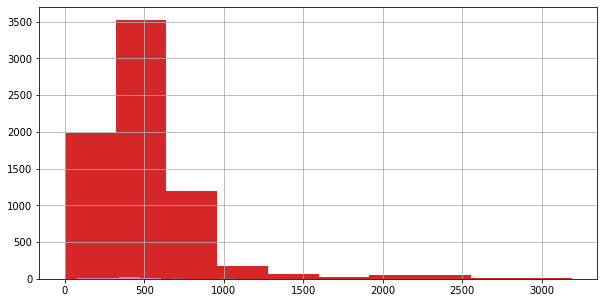

In [23]:
#df.groupby('locality_name')['cityCenters_nearest'].unique().hist(bins = 10, figsize=(15, 20))
df.groupby('locality_name')['parks_nearest'].hist(bins = 10, figsize=(10, 5))

Продавец не указал число балконов - скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Высоту потолков и кухни заменила на медианные значения по населенным пунктам. Пропусков по населенным пунктам и этажности домов крайне мало, относительно всего набора данных - можно их отбросить. Кроме того, не во всех населенных пунктах есть аэропорты. Если значения пропущены, как, например, в "городской посёлок Янино-1" то, скорее всего аэропорта там и нет. Поэтому можно заменить на 0. По той же логике заменила значения в столбцах для значений "parks_around3000" и "ponds_around3000" — число парков и число водоёмов в радиусе 3 км соответственно. Значения для расстоянии до центра города, а также ближайших парках, прудах заменила на медианы по соответствующим населенным пунктам.

Пропуски в столбце "is_apartment" пропадут, как только будет указан правильный тип данных. Вернемся к нему в следующем шаге.

Пропуски в "days_exposition" скорее всего были получены из-за того, что продавец не закрыл объявление о продаже и/или из-за технической ошибки. Оставила как есть, так как их количество не велико относительно общего числа измерений.


In [24]:
#проверка на наличие пропусков.
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8915
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest      5371
parks_around3000            0
parks_nearest           15236
ponds_around3000            0
ponds_nearest           14237
days_exposition          3092
dtype: int64

#### Изменение типов данных:

Посредством вызова функции info() были изучены типы данных в таблице: 

0   total_images          23565 non-null  int64  

1   last_price            23565 non-null  float64 -- если речь идет о миллионах, то нет смысла считать копейки, преобразуем в целочисленное значение
 
 2   total_area            23565 non-null  float64
 
 3   first_day_exposition  23565 non-null  object -- нужен формат даты и времени
 
 4   rooms                 23565 non-null  int64  
 
 5   ceiling_height        23565 non-null  float64
 
 6   floors_total          23565 non-null  float64 -- этажи могут быть только целыми числами
 
 7   living_area           23565 non-null  float64
 
 8   floor                 23565 non-null  int64  
 
 9   is_apartment          2760 non-null   object -- это должен быть тип bool
 
 10  studio                23565 non-null  bool   
 
 11  open_plan             23565 non-null  bool   
 
 12  kitchen_area          23565 non-null  float64 
 
 13  balcony               23565 non-null  object -- количество балконов может быть только целым числом
 
 14  locality_name         23565 non-null  object 
 
 15  airports_nearest      23565 non-null  object -- необходимо сменить на float
 
 16  cityCenters_nearest   18064 non-null  float64
 
 17  parks_around3000      18065 non-null  float64 
 
 18  parks_nearest         8030 non-null   float64
 
 19  ponds_around3000      18065 non-null  float64 
 
 20  ponds_nearest         9036 non-null   float64
 
 21  days_exposition       20394 non-null  float64

In [25]:
#изменяем типы переменных
#df['last_price'] = df['last_price'].astype(int)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#df['floors_total'] = df['floors_total'].astype(int)
df['airports_nearest'] = df['airports_nearest'].astype(float)

#df['balcony'] = df['balcony'].astype(int) 
columns_to_replace = ['balcony', 'floors_total', 'last_price']
for column in columns_to_replace:
    df[column] = df[column].astype('int') 

In [26]:
#Проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23091 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23091 non-null  int64         
 1   last_price            23091 non-null  int64         
 2   total_area            23091 non-null  float64       
 3   first_day_exposition  23091 non-null  datetime64[ns]
 4   rooms                 23091 non-null  int64         
 5   ceiling_height        14176 non-null  float64       
 6   floors_total          23091 non-null  int64         
 7   living_area           21226 non-null  float64       
 8   floor                 23091 non-null  int64         
 9   is_apartment          23091 non-null  bool          
 10  studio                23091 non-null  bool          
 11  open_plan             23091 non-null  bool          
 12  kitchen_area          20869 non-null  float64       
 13  balcony         

#### Удаление неявнях дубликатов в locality_name.

In [27]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. 

In [28]:
#Избавляемся от неявных дубликатов 

df['locality_name'] = (
    df['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 'поселок городского типа', 'коттеджный поселок', 'поселок'], 'село', regex=True)
) 

##### check name

In [29]:
# check
df.locality_name.nunique()

318

In [30]:
# check
df.shape

(23091, 22)

In [31]:
#теперь удалим явные дубликаты
#df = df['locality_name'].drop_duplicates()

In [32]:
# check
df.shape

(23091, 22)

В итоге проделанной работы были удалены пропуски и дубликаты, изменены типы данных. Теперь данные готовы для дальнейшего анализа.

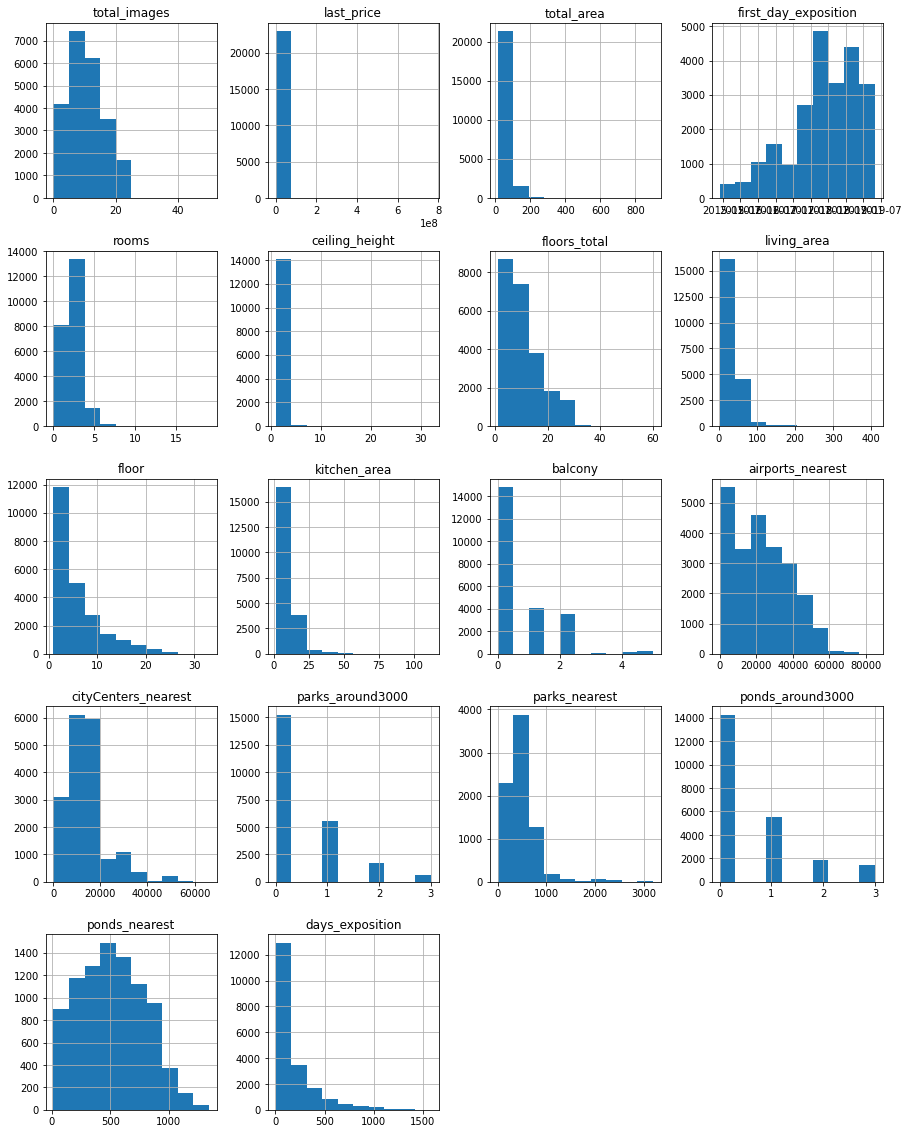

In [33]:
#проверяем получившиеся значения. 
df.hist(figsize=(15, 20));

In [34]:
#готовая таблица
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,село Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,9.10,0,село Янино-1,0.0,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,14.40,1,село Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,8.81,0,село Мурино,0.0,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Добавьте в таблицу новые столбцы

In [35]:
#цена одного квадратного метра;
df['price_per_metre'] = df['last_price']/df['total_area']
df['price_per_metre'] = round(df['price_per_metre'], 2)

In [36]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
df['publication_weekday'] = df['first_day_exposition'].dt.weekday


In [37]:
#месяц публикации объявления;
df['publication_month'] = df['first_day_exposition'].dt.month

In [38]:
#год публикации объявления;
df['publication_year'] = df['first_day_exposition'].dt.year

In [39]:
#тип этажа квартиры (значения — «первый», «последний», «другой»);
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor, axis=1)

In [40]:
#расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
df['cc_distance_km'] = round(df['cityCenters_nearest'] / 1000)
    
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,publication_weekday,publication_month,publication_year,floor_type,cc_distance_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

####  Построение гистограмм и удаление аномалий. 

Список параметров:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего парка



##### общая площадь;

In [41]:

print('Информация по площади:', df['total_area'].describe())
print('Наибольшие по площади варианты:',df['total_area'].value_counts(ascending = False))


Информация по площади: count    23091.000000
mean        60.204183
std         35.519142
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64
Наибольшие по площади варианты: 45.00     412
42.00     371
31.00     344
44.00     337
60.00     337
         ... 
37.92       1
115.60      1
117.40      1
62.34       1
55.06       1
Name: total_area, Length: 2135, dtype: int64


In [42]:
df = df.loc[df['total_area'] < 200]

count    22871.000000
mean        58.046072
std         26.345743
min         12.000000
25%         40.000000
50%         51.500000
75%         68.500000
max        199.200000
Name: total_area, dtype: float64


<AxesSubplot:title={'center':'Площадь квартир'}, ylabel='Frequency'>

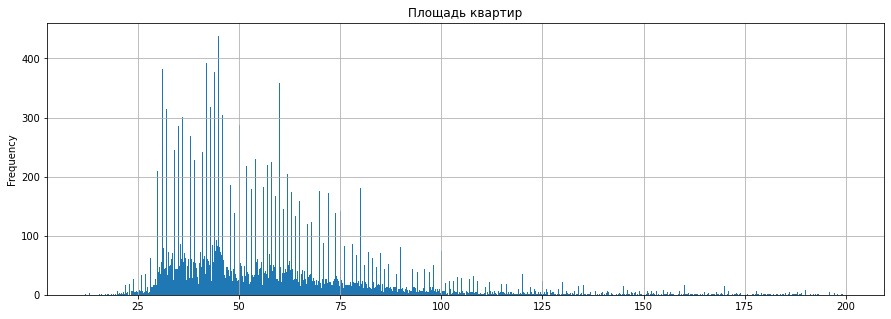

In [43]:
#избавляемся от аномальных значений
#df['total_area'] = df['total_area'].apply(lambda x: x/10 if x>200 else x)

print(df['total_area'].describe())
df['total_area'].plot(kind='hist', xlabel = 'Квадратные метры', ylabel = 'Количество квартир', bins= 1000, figsize = (15,5), range = (12, 200),title= 'Площадь квартир', grid=True)

Изучая исходные данные, были найдены аномалии максимальная площадь 900кв.метров. Предположу, что это аномальное значение и отбросим значения больше 200 кв метров, как редкие. После исправления этой аномалии получили следующие значения: большинство квартир имеют площадь в диапазоне от 40 до 70 кв.метров, реже от 100 до 200.

##### жилая площадь

In [44]:

print('Информация по жилой площади:', df['living_area'].describe())
print('Наибольшие по жилой площади варианты:',df['living_area'].value_counts(ascending = False))


Информация по жилой площади: count    21035.000000
mean        32.965074
std         17.079372
min          2.000000
25%         18.500000
50%         30.000000
75%         42.000000
max        150.800000
Name: living_area, dtype: float64
Наибольшие по жилой площади варианты: 18.00     871
17.00     670
30.00     583
16.00     482
20.00     467
         ... 
49.25       1
125.10      1
33.47       1
20.97       1
16.74       1
Name: living_area, Length: 1626, dtype: int64


#### check nan

In [45]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22871 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22871 non-null  int64         
 1   last_price            22871 non-null  int64         
 2   total_area            22871 non-null  float64       
 3   first_day_exposition  22871 non-null  datetime64[ns]
 4   rooms                 22871 non-null  int64         
 5   ceiling_height        14033 non-null  float64       
 6   floors_total          22871 non-null  int64         
 7   living_area           21035 non-null  float64       
 8   floor                 22871 non-null  int64         
 9   is_apartment          22871 non-null  bool          
 10  studio                22871 non-null  bool          
 11  open_plan             22871 non-null  bool          
 12  kitchen_area          20679 non-null  float64       
 13  balcony         

In [46]:
df = df.loc[df['living_area'] < 150]

In [47]:
# check
df.shape[0]

21034

In [48]:
df = df.loc[df['living_area'] >= 6]
print('Информация по жилой площади:', df['living_area'].describe())

Информация по жилой площади: count    21028.000000
mean        32.967906
std         17.055550
min          6.000000
25%         18.500000
50%         30.000000
75%         42.000000
max        147.200000
Name: living_area, dtype: float64


<AxesSubplot:title={'center':'Жилая площадь квартир'}, ylabel='Frequency'>

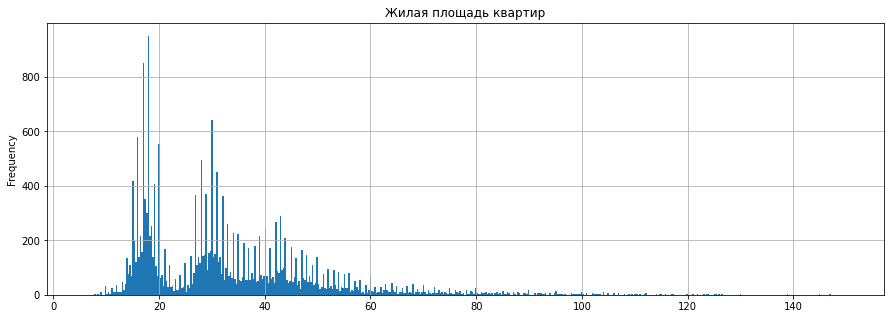

In [49]:
df['living_area'].plot(kind='hist', xlabel = 'Квадратные метры', ylabel = 'Количество квартир', bins= 500, figsize = (15,5), range = (6, 150),title= 'Жилая площадь квартир', grid=True)

Среднее значение по жилой площади = 30 кв.метров. Видим 2 пика: 18кв.м и в районе 25кв.метров. 25% квартир имеют жилую площадь 18.5кв.метров. Максимум 147кв.м  ЖК РФ устанавливает и минимальную норму жилой площади - 6 кв. м на одного человека, поэтому удалим данные, которые не соответствуют данному требованию. Также удалим редкие значения, то есть те, что больше 150кв.м.

In [50]:
# check
df.shape[0]

21028

##### площадь кухни

In [51]:
print('Информация по площади кухни:', df['kitchen_area'].describe())
print('Наибольшие по площади кухни варианты:',df['kitchen_area'].value_counts(ascending = False))

Информация по площади кухни: count    20245.000000
mean        10.235401
std          5.079802
min          1.300000
25%          7.000000
50%          9.000000
75%         11.700000
max         93.200000
Name: kitchen_area, dtype: float64
Наибольшие по площади кухни варианты: 6.00     1245
10.00    1204
8.00     1076
9.00     1052
7.00     1025
         ... 
14.74       1
13.41       1
34.51       1
8.18        1
16.74       1
Name: kitchen_area, Length: 856, dtype: int64


In [52]:
df = df.drop(df[df['kitchen_area'] > 40].index)
df = df.drop(df[df['kitchen_area'] < 5].index)
print(df['kitchen_area'].describe())

count    20078.000000
mean        10.119225
std          4.463625
min          5.000000
25%          7.000000
50%          9.000000
75%         11.600000
max         40.000000
Name: kitchen_area, dtype: float64


count    20078.000000
mean        10.119225
std          4.463625
min          5.000000
25%          7.000000
50%          9.000000
75%         11.600000
max         40.000000
Name: kitchen_area, dtype: float64


<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

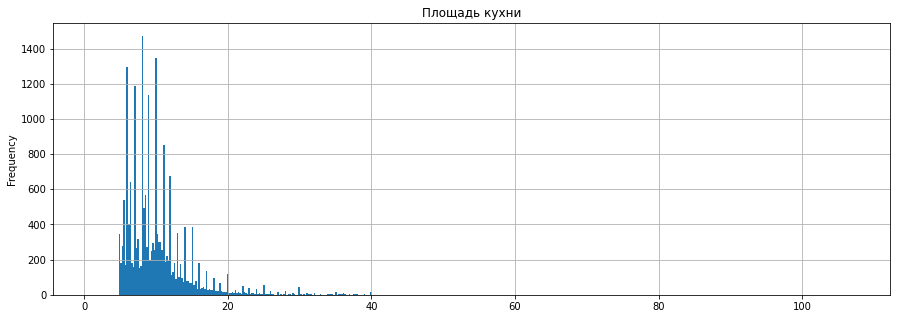

In [53]:
#исправление аномальных значений 
#df['kitchen_area'] = df['kitchen_area'].apply(lambda x: x/10 if x>50 else x)
#проверка
print(df['kitchen_area'].describe())
#построение диаграммы
df['kitchen_area'].plot(kind='hist', figsize = (15,5), bins= 500, range = (1, 107),title= 'Площадь кухни', grid=True)

Максимальная площадь кухни = 93кв.метров. Средняя площадь кухни равна 10.2 кв.м. Большинство квартир имеют кухни площадью 9 кв.м., 25% = 7 кв.м. или = 11.7кв.м. Кухня не может быть меньше 5 кв.м. и редко встречаются значения больше 40 - отбросим эти значения.

##### цена объекта;

In [54]:
print('Информация по цене объекта:', df['last_price'].describe())
print('Наибольшие по цене объекта варианты:',df['last_price'].value_counts(ascending = False))

Информация по цене объекта: count    2.086100e+04
mean     5.912341e+06
std      5.908335e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.600000e+06
75%      6.600000e+06
max      3.300000e+08
Name: last_price, dtype: float64
Наибольшие по цене объекта варианты: 4500000     310
3500000     259
4200000     245
3600000     238
4300000     237
           ... 
6106066       1
5635000       1
2034000       1
1899400       1
12288000      1
Name: last_price, Length: 2501, dtype: int64


<AxesSubplot:title={'center':'цена объекта'}, ylabel='Frequency'>

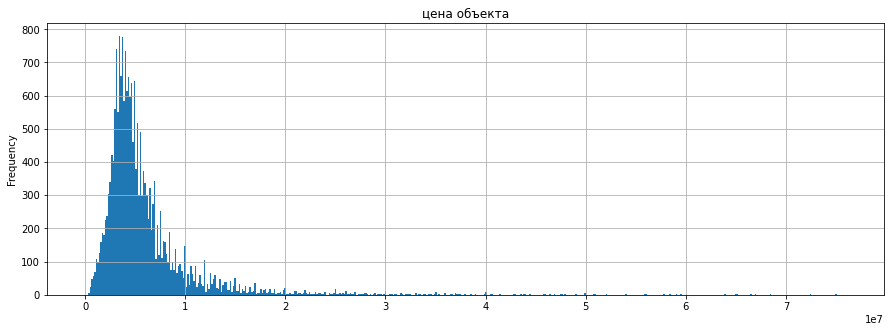

In [55]:
#построение диаграммы
df['last_price'].plot(kind='hist', bins= 500, figsize = (15,5), range = (10000, 76000000), title= 'цена объекта', grid=True, xlabel='Цена', ylabel='Объекты' )


Информация по цене объекта: count    2.060300e+04
mean     5.511026e+06
std      3.397253e+06
min      5.200000e+05
25%      3.440000e+06
50%      4.600000e+06
75%      6.500000e+06
max      2.490000e+07
Name: last_price, dtype: float64


<AxesSubplot:title={'center':'цена объекта'}, ylabel='Frequency'>

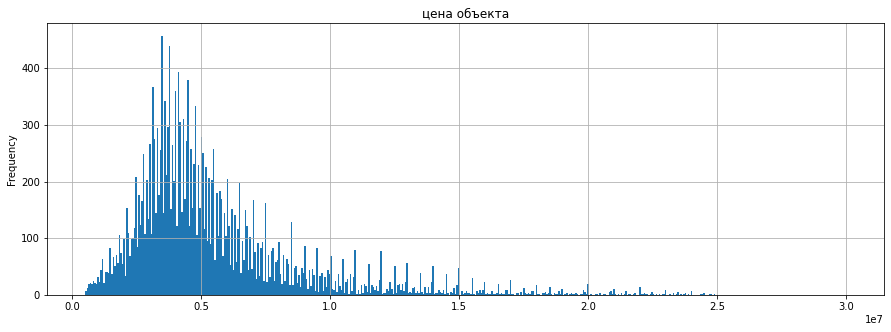

In [56]:
df = df.loc[df['last_price'] > 500000]
df = df.loc[df['last_price'] < 25000000]
print('Информация по цене объекта:', df['last_price'].describe())
df['last_price'].plot(kind='hist', bins= 500, figsize = (15,5), range = (500000, 30000000), title= 'цена объекта', grid=True, xlabel='Цена', ylabel='Объекты' )

Мало вероятно, что квартира имеет стоимость 760млн рублей, поэтому будем считать это значение аномалией и исправим его. Также отбросим все значения больше 25млн.рублей, как редкие, и меньше 500тыс.рублей, как аномалии. Получаем, что средняя цена квартиры колеблется в районе 5,5 млн рублей. 25% = 3.45 млн р., медианное значение = 4.58млн р., реже = 6.5млн. Максимальная стоимость = 25 млн рублей.

##### количество комнат;

In [57]:
print('Информация по количеству комнат:', df['rooms'].describe())
print('Наибольшие по количеству комнат:',df['rooms'].value_counts(ascending = False))

Информация по количеству комнат: count    20603.000000
mean         2.011066
std          0.977752
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64
Наибольшие по количеству комнат: 1     7174
2     7027
3     5030
4      926
5      202
0      181
6       45
7       15
8        2
11       1
Name: rooms, dtype: int64


count    20600.000000
mean         2.010049
std          0.974028
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


<AxesSubplot:title={'center':'количество комнат'}, ylabel='Frequency'>

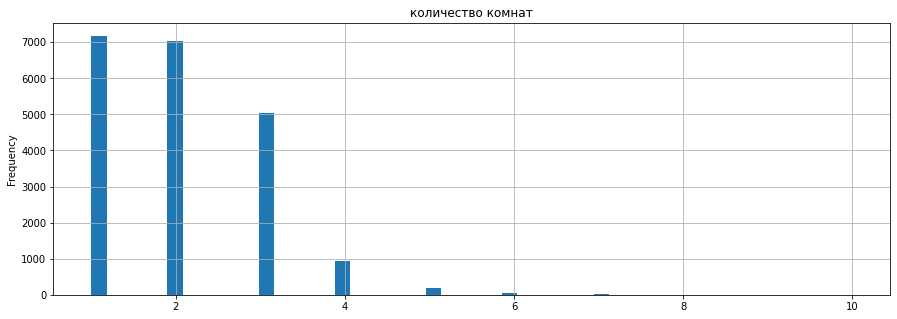

In [58]:
df = df.loc[df['rooms'] < 8]
#проверка
print(df['rooms'].describe())
df['rooms'].plot(kind='hist', bins= 50, figsize = (15,5), range = (1, 10),title= 'количество комнат', grid=True)

Чаще всего мы имеем дело с объявлениями о продаже 1, 2х и 3х-комнатных квартир. Также встречаются часто студии и 4-7-комнатные квартиры, пару квартир с 8-11 комнатами, отбросим их как редкие. 

##### высота потолков;

In [59]:
print('Информация по высоте потолков:', df['ceiling_height'].describe())
print('Наибольшие по высоте потолков варианты:',df['ceiling_height'].value_counts(ascending = False))

Информация по высоте потолков: count    12954.000000
mean         2.748869
std          0.967770
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64
Наибольшие по высоте потолков варианты: 2.50    3201
2.60    1531
2.70    1454
2.55     924
3.00     900
        ... 
4.06       1
3.59       1
3.48       1
2.49       1
4.40       1
Name: ceiling_height, Length: 159, dtype: int64


count    12907.000000
mean         2.707348
std          0.242071
min          2.400000
25%          2.500000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:title={'center':'высота потолков'}, ylabel='Frequency'>

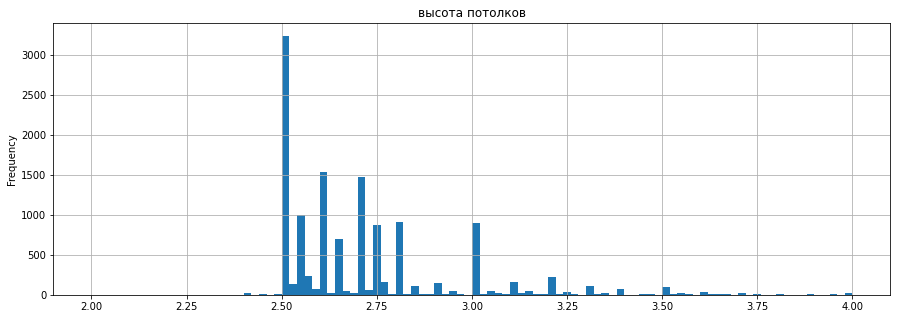

In [60]:
#исправление аномальных значений 
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: x/10 if x>4 else x)
#df = df.loc[df['ceiling_height'] > 2.4]
df = df.drop(df[df['ceiling_height'] < 2.4].index)
#data = data.drop(data[data['Комнат'] == 'Для заметок:'].index)
#проверка
print(df['ceiling_height'].describe())
#построение диаграммы
df['ceiling_height'].plot(kind='hist', bins= 100, figsize = (15,5), range = (2, 4),title= 'высота потолков', grid=True)

Минимальной нормой в России считается высота потолка 2,4 метра, в наших данных 2,45. Поэтому удалим все значения больше 4ех метров и меньше 2,4. Среднее значение потолков 2,7 метром.

In [61]:
# check
df.shape[0]

20553

Устранили аномалии по двум прзнакам. Первый: пользователь некорректно ввел данные. Скорее всего вместо 2,2м ввел 22 и тд. И второе: высота потолков в нынешних квартирах не может быть меньше 2м, отбросим эти значения. Получили, что минимальное значение высоты потолков =  2.2м, 25% квартир имеют высоту потолков 2.6м, в среднем - 2.65м и максимальная высота = 3м.

##### общее количество этажей в доме;

In [62]:

print('Информация по количеству этажей в доме:', df['floors_total'].describe())
print('Наибольшие по общему количеству этажей варианты:',df['floors_total'].value_counts(ascending = False))


Информация по количеству этажей в доме: count    20553.000000
mean        10.764073
std          6.579258
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
Наибольшие по общему количеству этажей варианты: 5     5022
9     3460
16    1232
12    1230
10    1045
4      980
25     938
17     758
6      731
3      554
14     498
7      477
18     444
24     407
15     304
2      304
23     303
19     286
8      279
22     253
20     227
13     197
11     163
27     151
21     135
26     111
35      21
28      20
1       15
36       3
52       1
34       1
60       1
29       1
33       1
Name: floors_total, dtype: int64


In [63]:
#удаляем редкие значения
df = df.loc[df['floors_total'] <= 28]
df['floors_total'].describe()

count    20524.000000
mean        10.728074
std          6.510361
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64

<AxesSubplot:title={'center':'общее количество этажей в доме'}, ylabel='Frequency'>

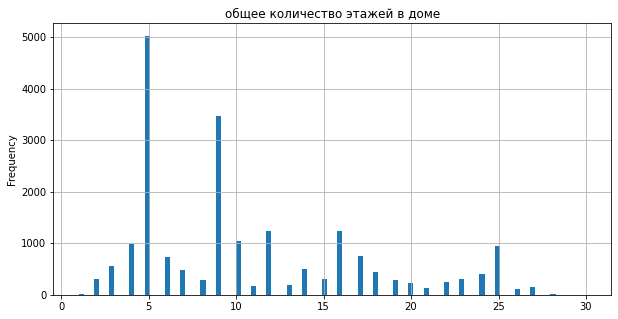

In [64]:
df['floors_total'].plot(kind='hist', bins= 100, figsize = (10,5), range = (1, 30),title= 'общее количество этажей в доме', grid=True)

Чаще всего мы имеем дело с 5-16ти этажными домами. Отбросили значения, которые больше 28 этажей, как редкие. 

##### расстояние до центра города в метрах;

In [65]:

print('Информация по расстоянию до центра города в метрах:', df['cityCenters_nearest'].describe())

print('Наибольшие по расстоянию до центра города в метрах варианты:',df['cityCenters_nearest'].value_counts(ascending = False))

Информация по расстоянию до центра города в метрах: count    15832.000000
mean     14514.882201
std       8619.486424
min        208.000000
25%       9857.750000
50%      13263.500000
75%      16399.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64
Наибольшие по расстоянию до центра города в метрах варианты: 8460.0     53
10720.0    27
8434.0     24
13845.0    23
10364.0    22
           ..
18725.0     1
9292.0      1
5761.0      1
64857.0     1
4234.0      1
Name: cityCenters_nearest, Length: 7073, dtype: int64


In [66]:
#df = df.loc[df['cityCenters_nearest'] <= 38000]
df = df.drop(df[df['cityCenters_nearest'] >= 38000].index)
df['cityCenters_nearest'].describe()

count    15544.000000
mean     13860.761580
std       7194.367258
min        208.000000
25%       9765.250000
50%      13167.500000
75%      16170.000000
max      37477.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:title={'center':'расстояние до центра города в метрах'}, ylabel='Frequency'>

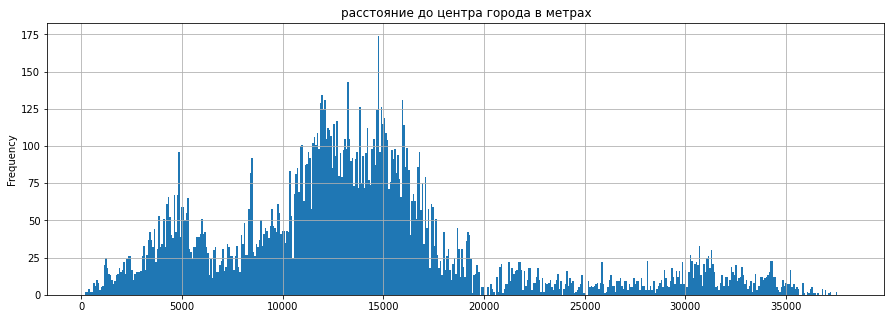

In [67]:
df['cityCenters_nearest'].plot(kind='hist', bins= 500, figsize = (15,5), range = (200, 38000),title= 'расстояние до центра города в метрах', grid=True)

Чаще всего квартиры удалены от центра на расстоянии от 5 до 15 км. Реже продаются квартиры,  расположенные непосредственно в центре. Максимальная удаленность = 66км, скорее всего это загородная постройка.

##### тип этажа квартиры («первый», «последний», «другой»);

In [68]:
#тип этажа квартиры («первый», «последний», «другой»);
print('Информация по типу этажа:', df['floor_type'].describe())
print('Наибольшие по типу этажа варианты:',df['floor_type'].value_counts(ascending = False))


Информация по типу этажа: count      20236
unique         3
top       другой
freq       15011
Name: floor_type, dtype: object
Наибольшие по типу этажа варианты: другой       15011
последний     2760
первый        2465
Name: floor_type, dtype: int64


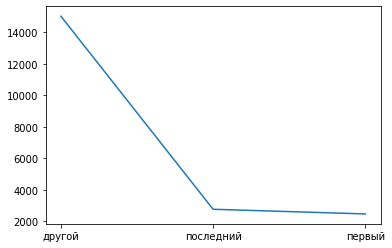

In [69]:
#СПОСОБ_№1_построение диаграмм_
#df['index'] = df.index

#sns.barplot(x = 'floor_type', y = 'floor_type.index', data = df)
# df['floor_type'].value_counts().plot(kind='hist', bins= 500, figsize = (15,5), range = (1900, 14000),title= 'расстояние до центра города в метрах', grid=True)

#СПОСОБ_№2_построение диаграмм
x = df['floor_type'].value_counts().index
y = df['floor_type'].value_counts().values
plt.plot(x, y )

Наибольшие по типу этажа варианты: 
другой -      15011, последний  -   2760, первый -       2465

In [70]:
# check
df['floor_type'].value_counts()

другой       15011
последний     2760
первый        2465
Name: floor_type, dtype: int64

##### расстояние до ближайшего парка в метрах

In [71]:
print('Информация по расстоянию до ближайшего парка:', df['parks_nearest'].describe())

print('Наибольшие по расстоянию до ближайшего парка варианты:',df['parks_nearest'].value_counts(ascending = False))

Информация по расстоянию до ближайшего парка: count    6769.000000
mean      493.234008
std       338.270471
min         1.000000
25%       293.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64
Наибольшие по расстоянию до ближайшего парка варианты: 441.0     57
456.0     35
392.0     31
173.0     31
471.0     27
          ..
861.0      1
2768.0     1
693.0      1
2711.0     1
929.0      1
Name: parks_nearest, Length: 969, dtype: int64


In [72]:
df = df.drop(df[df['parks_nearest'] >= 2500].index)
print('Информация по расстоянию до ближайшего парка:', df['parks_nearest'].describe())

Информация по расстоянию до ближайшего парка: count    6754.000000
mean      487.976606
std       319.558561
min         1.000000
25%       293.000000
50%       456.000000
75%       613.000000
max      2467.000000
Name: parks_nearest, dtype: float64


<AxesSubplot:title={'center':'расстояние до ближайшего парка'}, ylabel='Frequency'>

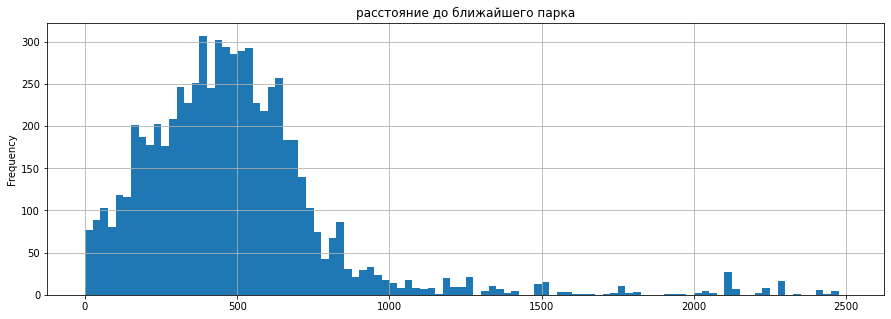

In [73]:
df['parks_nearest'].plot(kind='hist', bins= 100, range = (1, 2500), figsize = (15,5), title= 'расстояние до ближайшего парка', grid=True)

Среднее расстояние до ближайшего парка 488 метров, медианное 456. Максимальное расстояние 2467м. Отбросим все редкие значения, то есть те, что больше 2500 метров.

##### скорость продажи

In [74]:
#скорость продажи

print('Информация по скорости продажи:', df['days_exposition'].describe())

print('Наибольшие значения по скорости продажи:',df['days_exposition'].value_counts(ascending = False))

Информация по скорости продажи: count    17534.000000
mean       181.898426
std        217.960824
min          1.000000
25%         44.000000
50%         99.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64
Наибольшие значения по скорости продажи: 45.0      511
60.0      337
30.0      196
7.0       194
4.0       163
         ... 
671.0       1
1071.0      1
969.0       1
1147.0      1
1174.0      1
Name: days_exposition, Length: 1096, dtype: int64


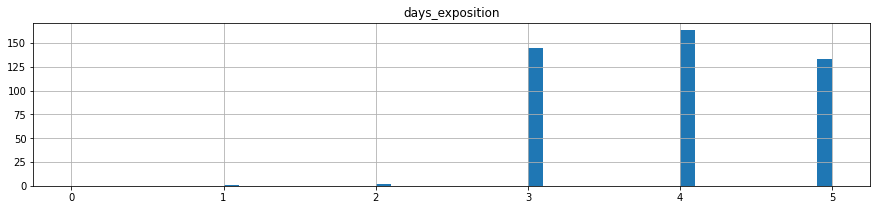

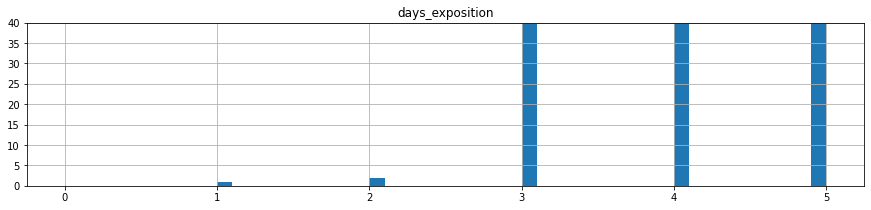

In [75]:
# check
df.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

df.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [76]:
#df = df.drop(df[(df['days_exposition'] > 600) & (df['days_exposition'] < 3)].index)
df = df.drop(df[df['days_exposition'] > 600].index)
df = df.drop(df[df['days_exposition'] < 3].index)
print('Информация по скорости продажи:', df['days_exposition'].describe())

Информация по скорости продажи: count    16515.000000
mean       140.936966
std        137.414466
min          3.000000
25%         41.000000
50%         90.000000
75%        199.000000
max        600.000000
Name: days_exposition, dtype: float64


<AxesSubplot:title={'center':'скорость продажи'}, ylabel='Frequency'>

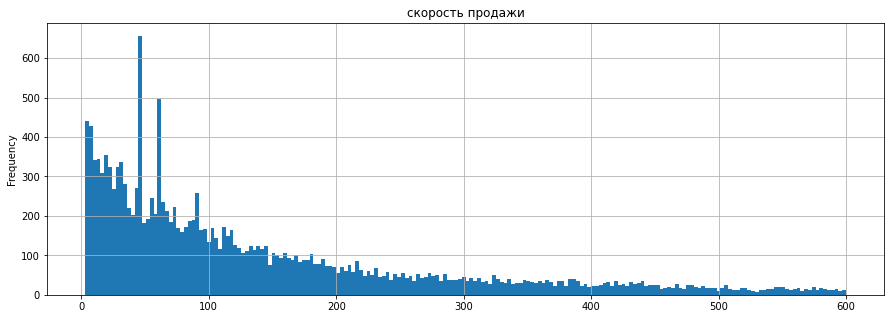

In [77]:
df['days_exposition'].plot(kind='hist', bins= 200, range = (3, 600),figsize = (15,5), title= 'скорость продажи', grid=True)

Средняя скорость продажи 140 дней, медианное 90. Максимальная скорость 1572 дня. Отбросим все редкие значения, то есть те, что больше 600 дней и меньше 3.

##### check gap

In [78]:
# check
data = df.copy()

In [79]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19202 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19202 non-null  int64         
 1   last_price            19202 non-null  int64         
 2   total_area            19202 non-null  float64       
 3   first_day_exposition  19202 non-null  datetime64[ns]
 4   rooms                 19202 non-null  int64         
 5   ceiling_height        12020 non-null  float64       
 6   floors_total          19202 non-null  int64         
 7   living_area           19202 non-null  float64       
 8   floor                 19202 non-null  int64         
 9   is_apartment          19202 non-null  bool          
 10  studio                19202 non-null  bool          
 11  open_plan             19202 non-null  bool          
 12  kitchen_area          18477 non-null  float64       
 13  balcony         

In [80]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
 

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"19,202.00","19,202.00","12,020.00","16,515.00","19,202.00","19,202.00","18,477.00","19,202.00","19,202.00"
min,0.00,12.00,2.40,3.00,"520,000.00",6.00,5.00,1.00,1.00
max,7.00,198.10,4.00,600.00,"24,900,000.00",147.20,40.00,27.00,28.00


In [81]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [82]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


In [83]:
# check
import matplotlib.pyplot as plt

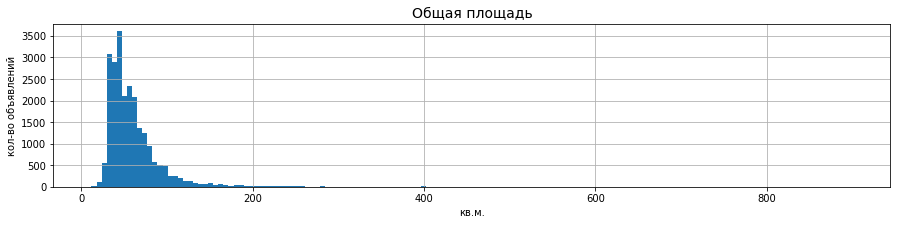

In [84]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

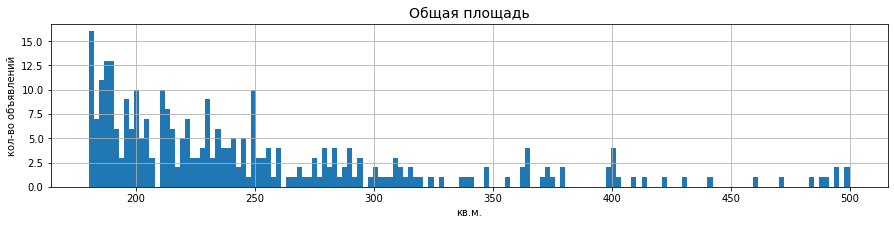

In [85]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

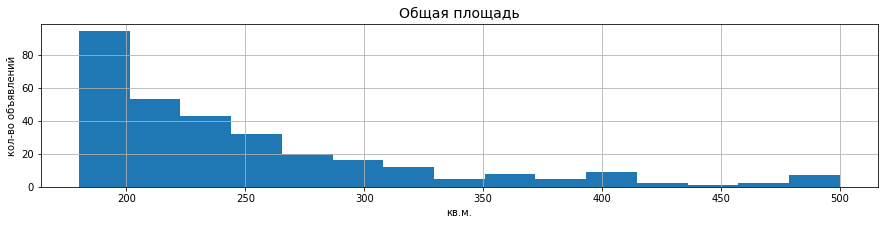

In [86]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

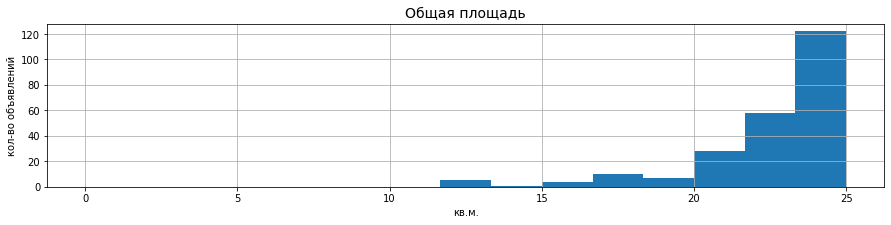

In [87]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

In [88]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,21.30,2.40,3.00,"650,000.00",10.00,5.00,1.00,2.00
0.01,1.00,26.00,2.50,4.00,"1,100,000.00",13.00,5.00,1.00,2.00
0.5,2.00,50.90,2.65,90.00,"4,580,500.00",30.00,9.00,4.00,9.00
0.99,5.00,143.00,3.60,563.86,"18,900,000.00",88.00,26.42,22.00,26.00
0.9988,6.00,181.98,4.00,595.00,"23,595,880.00",122.00,37.41,26.00,27.00


#### Изучите, как быстро продавались квартиры (столбец days_exposition).

count    16515.000000
mean       140.936966
std        137.414466
min          3.000000
25%         41.000000
50%         90.000000
75%        199.000000
max        600.000000
Name: days_exposition, dtype: float64


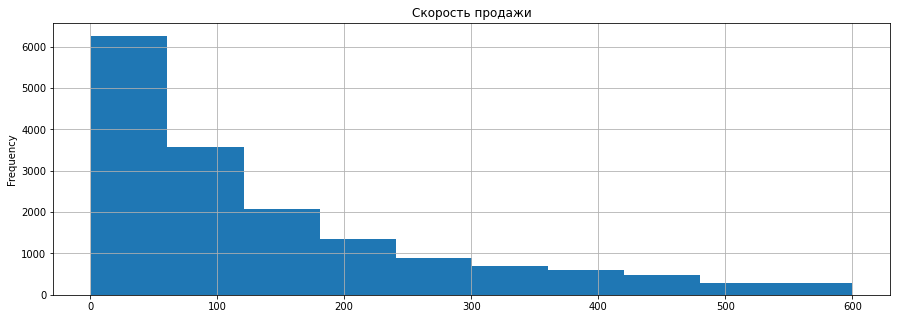

In [89]:
df['days_exposition'].plot(kind='hist', bins= 10, range = (1, 600), figsize = (15,5), title= 'Скорость продажи', grid=True)
print(df['days_exposition'].describe()) 


<AxesSubplot:xlabel='days_exposition'>

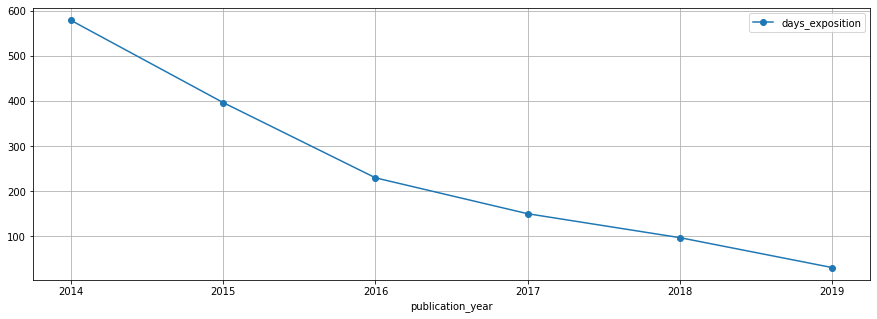

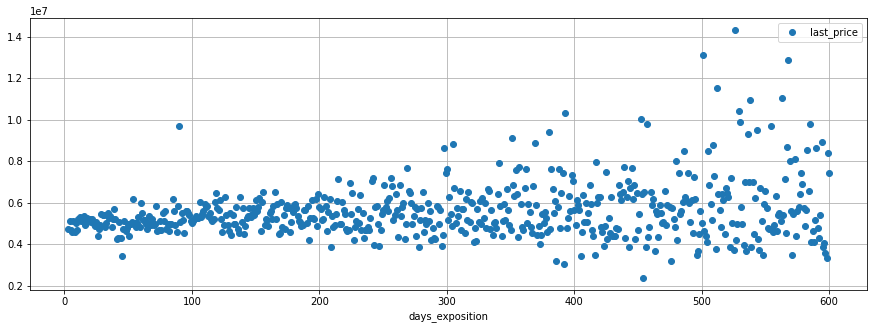

In [90]:
df.pivot_table(index='publication_year', values='days_exposition').plot(grid=True, style='o-', figsize=(15, 5))
df.pivot_table(index='days_exposition', values='last_price').plot(grid=True, style='o', figsize=(15, 5))

Медианное время продажи - 90 дней. Среднее время продажи - 140 дней. Есть небольшое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 41 дней и меньше. Долгой продажей - 199 дней (6,5 месяцев) и дольше.

Видим, что из года в год с 2014 по 2019 средняя скорость продажи квартиры уменьшилась. Большее значение по скорости продажи соответствует значениями с более низкой ценой, поэтому мы видим пик на гистограмме.

#### Факторы, которые влияют на общую (полную) стоимость объекта.

0.7802647683893401

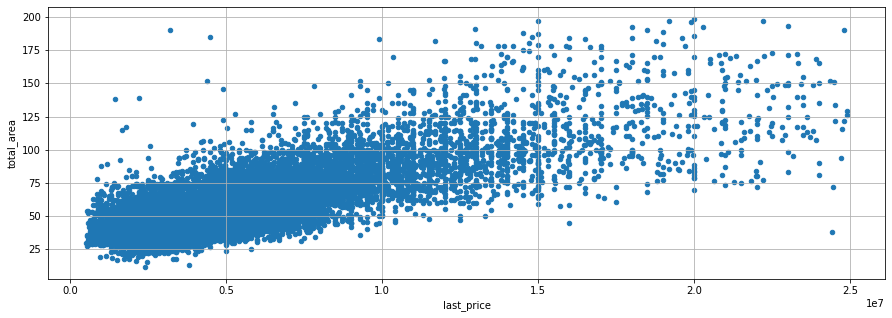

In [91]:
# как зависит  цена от общей площади

#df.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
df.plot.scatter (x = 'last_price', y = 'total_area', figsize=(15, 5), grid=True)
df['last_price'].corr(df['total_area'])

Забегая вперед, можно сказать, что зависимость цена от общей площади самая высокая, что, чаще всего, соответствует действительности.

0.6696357391067823

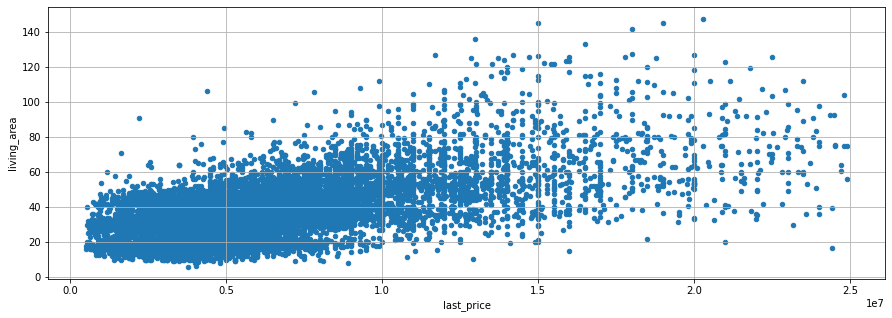

In [92]:
#как зависит цена от жилой площади; 

#df.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
df.plot.scatter (x = 'last_price', y = 'living_area', figsize=(15, 5), grid=True)
df['last_price'].corr(df['living_area'])

Прослеживается тенденция увеличения стоимости от жилой площади. 

0.5830775234874442

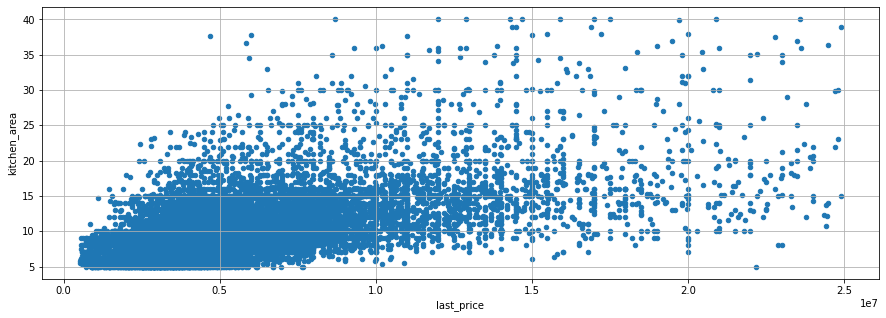

In [93]:
#как зависит цена от площади кухни; 

#df.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
df.plot.scatter (x = 'last_price', y = 'kitchen_area', figsize=(15, 5), grid=True)
df['last_price'].corr(df['kitchen_area'])

Площадь кухни значительно влияет на стоимость квартиры.

0.5084240971299573

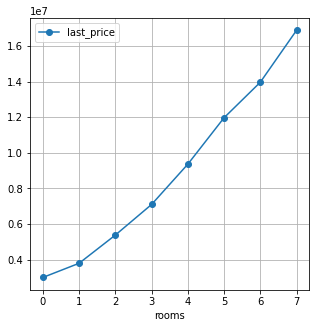

In [94]:
#как зависит цена от количества комнат; 

df.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
df['last_price'].corr(df['rooms'])

Можем наблюдать линейную зависимость цены квартры от количества комнат. 

         last_price
floor              
26     3.961053e+06
27     4.187837e+06
1      4.475378e+06
5      5.224688e+06
2      5.309328e+06


,total_area
floor,
26,43.072105
27,50.380000
24,51.379792
23,52.584268
17,53.729110


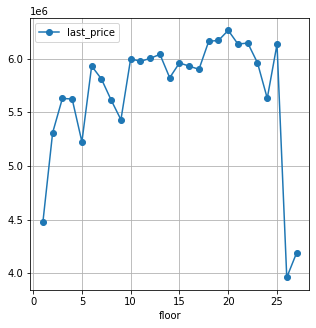

In [95]:
#как зависит цена от этажа

df.pivot_table(index='floor', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
df['last_price'].corr(df['kitchen_area'])
print(df.pivot_table(index='floor', values='last_price').sort_values(by = 'last_price', ascending = True).head())
df.pivot_table(index='floor', values='total_area').sort_values(by = 'total_area', ascending = True).head()

Четко прослеживается зависимость стоимости от этажности: дешевле всего квартиры на 1 этаже, на средних значеиях от 6 до 25 ценовой диапазон относительно не изменяется. Видим проседающее значение на этажах 26, 27 - это квартиры с самой маленькой площадь, отсюда и провал в цене.

<AxesSubplot:xlabel='floor_type'>

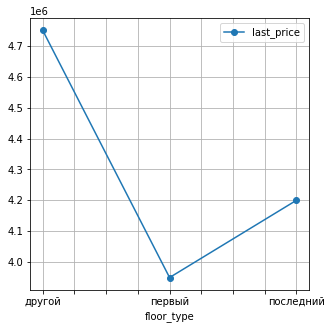

In [96]:
#как зависит цена от этажа на котором расположена квартира (первый, последний, другой); 

df.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))

Подтверждается гипотеза о зависимости цены от этажности: самые дешевые квартиры на первом этаже.

<AxesSubplot:xlabel='publication_weekday'>

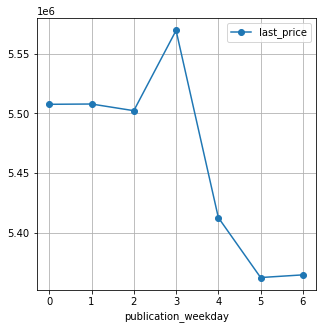

In [97]:
#как зависит цена от даты размещения (день недели, месяц, год).

df.pivot_table(index='publication_weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))


Дороже всего были проданы квартиры, объявление о продаже которых было опубликовано в среду, дешевле всего в пт и вс. Но четкой зависимости нет, скорее всего это просто совпадение. 

<AxesSubplot:xlabel='publication_month'>

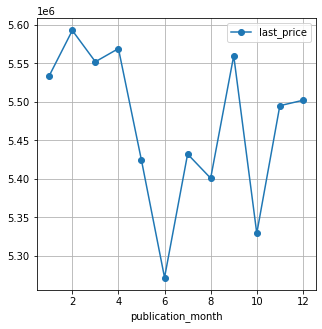

In [98]:
df.pivot_table(index='publication_month', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

Хуже всего квартиры продаются в мае-июле. Это логично, люди в отпусках и спрос небольшой - продавцы снижают стоимость для более быстрой продажи. 

0.011380742708927595

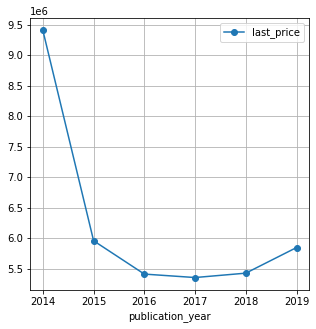

In [99]:
df.pivot_table(index='publication_year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
df['last_price'].corr(df['publication_year'])

<AxesSubplot:xlabel='publication_year'>

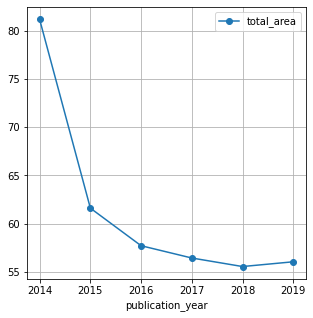

In [100]:
df.pivot_table(index='publication_year', values='total_area').plot(grid=True, style='o-', figsize=(5, 5))


<AxesSubplot:xlabel='publication_year'>

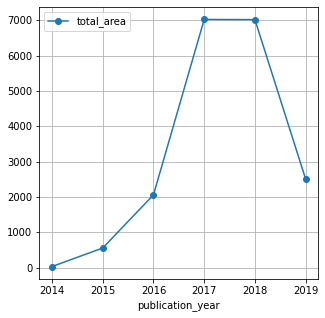

In [101]:
df.pivot_table(index='publication_year', values='total_area', aggfunc = 'count').plot(grid=True, style='o-', figsize=(5, 5))

Наиболее выгодно можно было продать квартиру в 2014 году, далее видим спад по стоимости. Ситуация на рынке начинает исправляться в 2019 году. Довольно странная зависимость, учитывая то, что рынок растет из года в год. Изучив этот вопрос подробнее, выяснили, что в нашем случае мы имеем дело с уменьшением площади, отсюда и уменьшение цены.

#### Топ-10 по цене за квадратный метр

                 price_per_metre
locality_name                   
Санкт-Петербург    108836.409150
Пушкин             102266.214903
деревня Кудрово     92686.853739
село Парголово      90155.724844
село Мурино         85960.024286
село Шушары         78736.702891
Колпино             75165.056369
Гатчина             68796.756705
Всеволожск          68742.126131
Выборг              58725.477267


<AxesSubplot:xlabel='locality_name'>

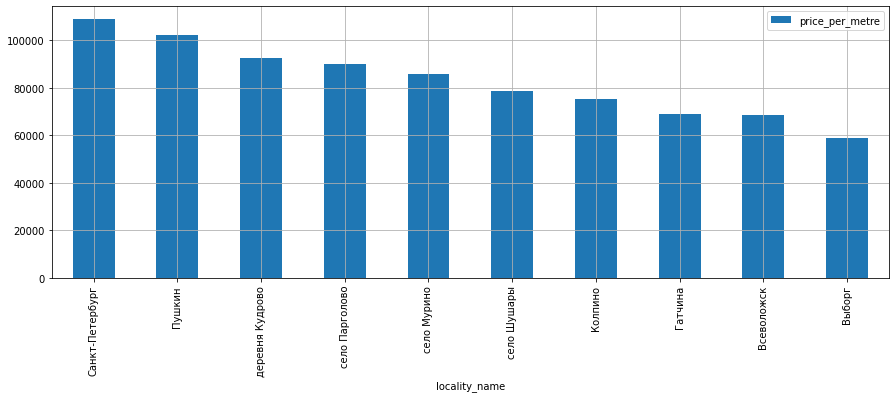

In [102]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
top_ten_cities = df['locality_name'].value_counts().head(10)
top_ten_price = df.query('locality_name in (@top_ten_cities.index)').pivot_table(values='price_per_metre', index='locality_name')
print(top_ten_price.sort_values('price_per_metre', ascending=False))
top_ten_price.sort_values(by = 'price_per_metre', ascending = False).plot(grid=True, kind = 'bar', figsize=(15, 5))

Как и ожидалось, наиболее дорогие квартиры в СПб. Оно и понятно, СПб - культурная столица России.

#### Зависимость средней цены для каждого километра от центра Петербурга.

<AxesSubplot:xlabel='cc_distance_km'>

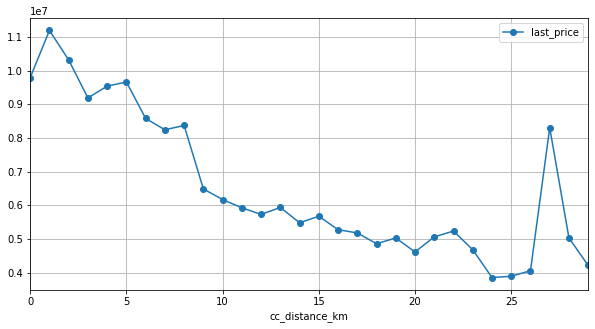

In [103]:
saint_p = df.loc[df['locality_name'] == 'Санкт-Петербург']
saint_p['cc_distance_km'].describe()
saint_p.pivot_table(index='cc_distance_km', values='last_price').plot(grid=True, style='o-', xlim=(0,29), figsize=(10, 5))

Чем дальше от центра города, тем ниже стоимость квартиры. 

In [104]:
saint_p.query('locality_name == "Санкт-Петербург" and cc_distance_km >= 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,publication_weekday,publication_month,publication_year,floor_type,cc_distance_km
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0.0,NaN,128.0,193918.92,1,11,2017,другой,27.0
814,0,7600000,111.0,2017-07-26,3,3.00,16,63.0,12,False,...,185.0,2.0,72.0,66.0,68468.47,2,7,2017,другой,28.0
1111,0,4072000,38.0,2015-10-14,1,NaN,5,16.0,4,False,...,NaN,0.0,NaN,285.0,107157.89,2,10,2015,другой,28.0
5961,6,2250000,32.0,2018-02-27,1,NaN,2,16.5,2,False,...,NaN,0.0,NaN,178.0,70312.50,1,2,2018,последний,27.0
9572,0,3413000,43.0,2015-11-10,1,NaN,5,18.0,1,False,...,NaN,0.0,NaN,258.0,79372.09,1,11,2015,первый,28.0
10798,10,4850000,62.0,2017-05-16,3,NaN,5,35.7,1,False,...,NaN,0.0,NaN,63.0,78225.81,1,5,2017,первый,29.0
11652,16,4700000,51.0,2016-06-07,2,2.60,5,30.0,1,False,...,NaN,0.0,NaN,539.0,92156.86,1,6,2016,первый,29.0
12160,8,2450000,43.0,2018-08-14,1,2.75,5,16.0,1,True,...,NaN,0.0,NaN,8.0,56976.74,1,8,2018,первый,29.0
13031,16,4200000,56.8,2018-07-04,2,3.50,3,27.9,1,False,...,NaN,0.0,NaN,187.0,73943.66,2,7,2018,первый,29.0
16787,20,4850000,85.8,2019-04-22,3,3.60,3,49.4,2,False,...,NaN,0.0,NaN,NaN,56526.81,0,4,2019,другой,29.0


In [105]:
saint_p = saint_p.drop (index= 748) 


<AxesSubplot:xlabel='cc_distance_km'>

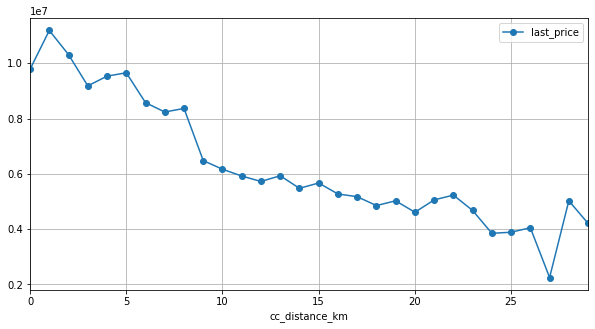

In [106]:
saint_p.pivot_table(index='cc_distance_km', values='last_price').plot(grid=True, style='o-', xlim=(0,29), figsize=(10, 5))


на 27-ом км были 2 квартиры. строка 748 со стоимостью 14млн явно выброс, а вот вторая кв имеет небольшую площадь и вполне адекватное, относительно других кв, цену за кв.метр. Оставим ее.

In [107]:
#saint_p.query('cc_distance_km == 3 and floor_type').count()
#saint_p.query('floor_type and cc_distance_km == 5').count()
saint_p.pivot_table(index= 'cc_distance_km', values= 'floor_type' , aggfunc = 'count').head(6)

,floor_type
cc_distance_km,
0.0,10
1.0,120
2.0,207
3.0,268
4.0,496
5.0,627


Рассмотрели количество квартир разных категорий (первый, последний, другой), которые продаются на 3-м км. и 5-ом км. Провал на 3ем км объясняется тем, что там продается всего 268 квартир, в то время как на 5-ом продается 627. Поэтому получили пик на 5ом км.

In [108]:
# check
saint_p.pivot_table(index=['cc_distance_km', 'floor_type'], values= 'last_price' , aggfunc = 'count')[9:18]

last_price
cc_distance_km floor_type            
3.0            другой             160
               первый              44
               последний           64
4.0            другой             358
               первый              62
               последний           76
5.0            другой             476
               первый              61
               последний           90

### Вывод

Исследование объявлений о продаже квартир состояло из двух этапов.

1) предобработка данных. 

На входе мы имели датасет с 23699 объявлениями о продаже квартир. Сложности возникали с обработкой пропусков по автоматически заполненным ячейкам. Дело в том, что по каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.
В частности, многие продавцы не указали число балконов - скорее всего, их и нет вовсе, как это бывает на 1-ых этажах. Такие пропуски можно заменить на число 0. Высоту потолков и кухни заменили на медианные значения по населенным пунктам, отдельно рассмотрев высоту потолков в СПб. Пропусков по населенным пунктам и этажности домов крайне мало, относительно всего набора данных - можно их отбросить. Кроме того, не во всех населенных пунктах есть аэропорты. Если значения пропущены, как, например, в "городской посёлок Янино-1" то, скорее всего аэропорта там и нет. Поэтому можно заменить на 0. По той же логике заменила значения в столбцах для значений "parks_around3000" и "ponds_around3000" — число парков и число водоёмов в радиусе 3 км соответственно. Значения для расстоянии до центра города, а также ближайших парках, прудах заменила на медианы по соответствующим населенным пунктам, где это было возможно. Остальные пропуски оставили как есть, так как они не влияют на дальнейшее исследование. кроме того, исключили аномалии, где общая площадь была меньше суммы площадей кухни и жилой.

Пропуски в "days_exposition" скорее всего были получены из-за того, что продавец не закрыл объявление о продаже и/или из-за технической ошибки. Оставила как есть, так как их количество не велико относительно общего числа измерений.

Далее для полноты картины и более детального анализа были добавлены столбцы с информацией по цене  одного квадратного метра, дню недели, месяцу и году публикации объявления, тип этажа квартиры (значения — «‎первый», «последний», «другой»); расстояние до центра города в километрах. 

После приведенных выше манипуляций исследуем данные и проверим на наличие аномалий и вбросов. Таковых оказалось не мало: 
- ОБЩАЯ ПЛОЩАДЬ. Изучая исходные данные, были найдены аномалии максимальная площадь 900кв.метров. Предположу, что это аномальное значение и отбросим значения больше 200 кв метров, как редкие. После исправления этой аномалии получили следующие значения: большинство квартир имеют площадь в диапазоне от 40 до 70 кв.метров, реже от 100 до 200.
- ЖИЛАЯ ПЛОЩАДЬ. Среднее значение по жилой площади = 30 кв.метров. Видим 2 пика: 18кв.м и в районе 25кв.метров. 25% квартир имеют жилую площадь 18.5кв.метров. Максимум 147кв.м  ЖК РФ устанавливает и минимальную норму жилой площади - 6 кв. м на одного человека, поэтому удалим данные, которые не соответствуют данному требованию. Также удалим редкие значения, то есть те, что больше 150кв.м.
- ПЛОЩАДЬ КУХНИ. Максимальная площадь кухни = 93кв.метров. Средняя площадь кухни равна 10.2 кв.м. Большинство квартир имеют кухни площадью 9 кв.м., 25% = 7 кв.м. или = 11.7кв.м. Кухня не может быть меньше 5 кв.м. и редко встречаются значения больше 40 - отбросим эти значения.
- ЦЕНА ОБЪЕКТА. Мало вероятно, что квартира имеет стоимость 760млн рублей, поэтому будем считать это значение аномалией и исправим его. Также отбросим все значения больше 25млн.рублей, как редкие, и меньше 500тыс.рублей, как аномалии. Получаем, что средняя цена квартиры колеблется в районе 5,5 млн рублей. 25% = 3.45 млн р., медианное значение = 4.58млн р., реже = 6.5млн. Максимальная стоимость = 25 млн рублей.
- КОЛИЧЕСТВО КОМНАТ.Чаще всего мы имеем дело с объявлениями о продаже 1, 2х и 3х-комнатных квартир. Также встречаются часто студии и 4-7-комнатные квартиры, пару квартир с 8-11 комнатами, отбросим их как редкие. 
- ВЫСОТА ПОТОЛКОВ. В столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м.   И второе: минимальной нормой в России считается высота потолка 2,4 метра, в наших данных 2,45. Поэтому удалим все значения больше 4ех метров и меньше 2,4. Среднее значение потолков 2,7 метром.
- ОБЩЕЕ КОЛИЧЕСТВО ЭТАЖЕЙ В ДОМЕ. Чаще всего мы имеем дело с 5-16ти этажными домами. Отбросили значения, которые больше 28 этажей, как редкие. 
-РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА В МЕТРАХ. Чаще всего квартиры удалены от центра на расстоянии от 5 до 15 км. Реже продаются квартиры,  расположенные непосредственно в центре. Максимальная удаленность = 66км, скорее всего это загородная постройка.
- ТИП ЭТАЖА КВАРТИРЫ.Наибольшие по типу этажа варианты: другой - 15011, последний - 2760, первый - 2465 квартир.
- РАССТОЯНИЕ ДО БЛИЖАЙШЕГО ПАРКА. Среднее расстояние до ближайшего парка 488 метров, медианное 456. Максимальное расстояние 2467м. Отбросим все редкие значения, то есть те, что больше 2500 метров.
- СКОРОСТЬ ПРОДАЖИ. Средняя скорость продажи 140 дней, медианное 90. Максимальная скорость 1572 дня. Отбросим все редкие значения, то есть те, что больше 600 дней и меньше 3.

2) зависимости, которые удалось рассчитать. 

- как быстро продавались квартиры: 
Медианное время продажи - 90 дней. Среднее время продажи - 140 дней. Есть небольшое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев. Видим, что из года в год с 2014 по 2019 средняя скорость продажи квартиры уменьшилась. Большее значение по скорости продажи соответствует значениями с более низкой ценой, поэтому мы видим пик на гистограмме. 

- как зависит  цена от общей площади:
Забегая вперед, можно сказать, что зависимость цена от общей площади самая высокая, что, чаще всего, соответствует действительности. 

- как зависит цена от жилой площади:
Прослеживается тенденция увеличения стоимости от жилой площади.

- как зависит цена от площади кухни:
Площадь кухни значительно влияет на стоимость квартиры.

- как зависит цена от количества комнат:
Можем наблюдать  линейную зависимость цены квартиры от количества комнат. 

- как зависит цена от этажа:
Четко прослеживается зависимость стоимости от этажности: дешевле всего квартиры на 1 этаже, на средних значеиях от 6 до 25 ценовой диапазон относительно не изменяется. Видим проседающее значение на этажах 26, 27 - это квартиры с самой маленькой площадь, отсюда и провал в цене.

- как зависит цена от этажа на котором расположена квартира (первый, последний, другой):
Подтверждается гипотеза о зависимости цены от этажности: самые дешевые квартиры на первом этаже.

- как зависит цена от даты размещения (день недели, месяц, год):
Дороже всего были проданы квартиры, объявление о продаже которых было опубликовано в среду, дешевле всего в пт и вс. Но четкой зависимости нет, скорее всего это просто совпадение.
Хуже всего квартиры продаются в мае-июле. Это логично, люди в отпусках и спрос небольшой - продавцы снижают стоимость для более быстрой продажи. 
Наиболее выгодно можно было продать квартиру в 2014 году, далее видим спад по стоимости. Ситуация на рынке начинает исправляться в 2019 году. Довольно странная зависимость, учитывая то, что рынок растет из года в год. Изучив этот вопрос подробнее, выяснили, что в нашем случае мы имеем дело с уменьшением площади, отсюда и уменьшение цены.

- сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений:
Как и ожидалось, наиболее дорогие квартиры в СПб -- 114849.67руб/кв.м. Оно и понятно, СПб - культурная столица России. Далее по списку: Пушкин -- 103125.82руб, деревня Кудрово - 92 тыс.руб.,село Парголово -- 90тыс, село Мурино, село Шушары и тд
	
- как стоимость объектов зависит от расстояния до центра города:
Чем дальше от центра города, тем ниже стоимость квартиры. 



### Дополнительные решения

In [109]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

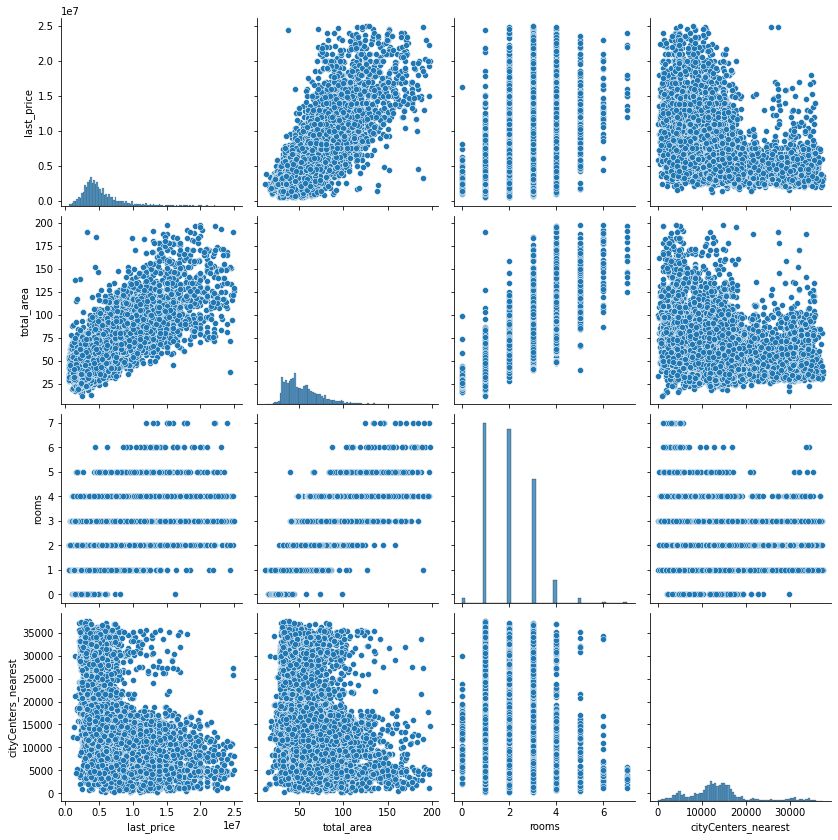

In [110]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


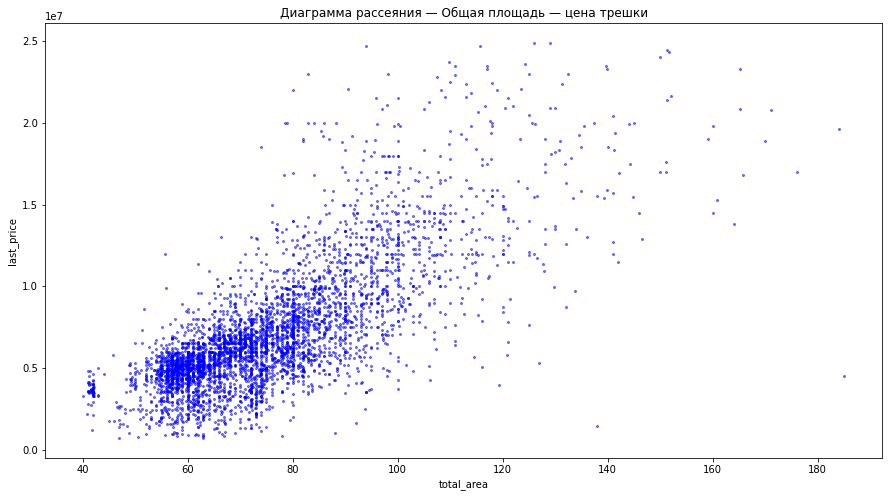

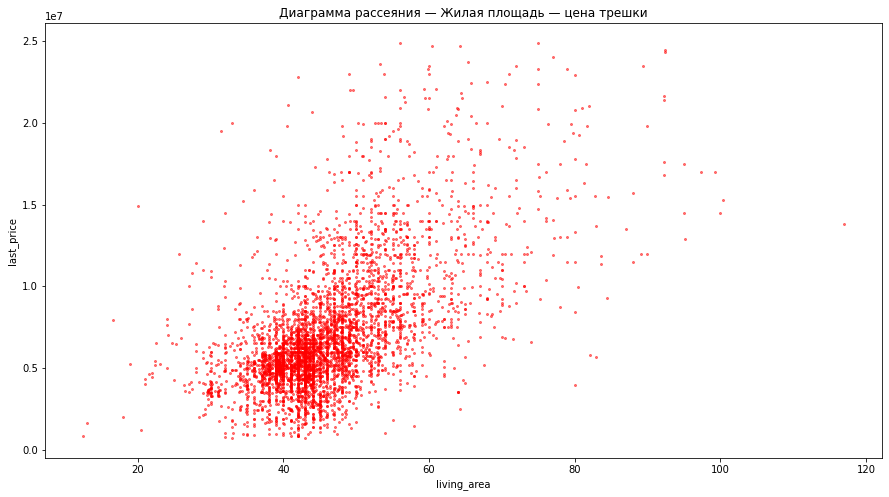

In [111]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

In [112]:
# check TOP-10
# способы группировки и сортировки информации

(
    data
    .groupby('locality_name')['last_price']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).style.format("{:,.0f}")

# .plot(y = 'mean', kind = 'bar')
# стайл и плот вместе не работают

,count,mean
locality_name,,
Санкт-Петербург,"12,887","6,452,212"
Пушкин,308,"5,978,540"
село Парголово,289,"4,450,818"
деревня Кудрово,238,"4,185,591"
село Шушары,384,"4,112,014"
Колпино,314,"3,833,762"
Всеволожск,336,"3,810,123"
село Мурино,462,"3,642,302"
Гатчина,264,"3,534,861"
